In [109]:
import pandas as pd
from scipy.stats import variation
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
#Exploratory Data Analysis
sales_data = pd.read_csv("/Users/John/Downloads/Walmart_Store_sales.csv")
sales_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12/3/10,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2/4/10,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,9/4/10,1545418.53,0,65.86,2.770,210.622857,7.808


In [111]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [112]:
#We want Date to be recognized as time data and not a string
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Q1: Which store has maximum sales?

In [113]:
sales_by_store = sales_data.groupby('Store')
summed_sales_store = sales_by_store.Weekly_Sales.sum()
print(round(summed_sales_store.sort_values(ascending=False).head(1),2))

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


Store 20 has the highest total sales. 

Q2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [114]:
volatile_store = sales_by_store.Weekly_Sales.std()
volatile_store.sort_values(ascending=False).head(1)

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [115]:
print(variation(summed_sales_store, axis=0))

0.5162718759553713


Store 14 has the highest standard deviation, meaning its weekly sales were the most volatile over the time period. The coefficient of variation for the aggregate sales of each store is ~52%. This is a relatively low CV, which indicates sales for these Walmart stores stay close to the mean from week to week.

Q3: Which store/s has good quarterly growth rate in Q3’2012?

I'll calculate total sales for each store in 2012 Q2 and Q3 and see how sales grew from one quarter to the next,
Then, I'll check for outliers compared to the mean and dispersion of store growth rates

In [116]:
Year2012 = sales_data['Date'] >= '01-01-2012'
print(Year2012)

0       False
1       False
2       False
3       False
4       False
        ...  
6430     True
6431     True
6432     True
6433     True
6434     True
Name: Date, Length: 6435, dtype: bool


In [117]:
sales_data_2012 = sales_data[Year2012 == True]
sales_data_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [118]:
Q3 = sales_data['Date'] >= '04-01-2012', sales_data['Date'] < '07-01-2012'
Q3

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 6430     True
 6431     True
 6432     True
 6433     True
 6434     True
 Name: Date, Length: 6435, dtype: bool, 0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 6430    False
 6431     True
 6432    False
 6433    False
 6434    False
 Name: Date, Length: 6435, dtype: bool)

In [119]:
Q3 = sales_data[(sales_data['Date'] >= '07-01-2012') & (sales_data['Date'] < '10-01-2012')].groupby('Store')
Q2 = sales_data[(sales_data['Date'] >= '04-01-2012') & (sales_data['Date'] < '07-01-2012')].groupby('Store')

In [120]:
Q3 = Q3.Weekly_Sales.sum()
Q2 = Q2.Weekly_Sales.sum()
growth = [((Q3 - Q2)/(Q2))*100]
growth

[Store
 1    -11.426342
 2    -10.716535
 3    -10.717379
 4     -9.625310
 5    -12.347142
 6    -11.518899
 7     -3.824738
 8     -8.885460
 9    -12.152357
 10   -10.293384
 11    -9.982231
 12   -10.731580
 13    -9.264673
 14   -17.551086
 15   -12.183321
 16    -2.789294
 17   -10.719910
 18    -9.593152
 19    -9.123188
 20   -10.469051
 21    -8.917697
 22   -11.332535
 23    -6.452678
 24    -9.242314
 25   -10.143607
 26    -6.057624
 27   -10.633092
 28   -11.364302
 29   -12.888364
 30   -10.444624
 31    -9.835123
 32    -8.258527
 33    -9.540218
 34   -10.746352
 35    -4.663086
 36   -12.523420
 37    -8.881539
 38   -10.520358
 39    -6.396875
 40    -9.354939
 41    -6.756521
 42   -10.217957
 43   -10.474373
 44    -6.988212
 45   -13.889207
 Name: Weekly_Sales, dtype: float64]

All stores had a decline in sales during Q3. Stores 2 and 7 had the least decline from Q2 compared to the average. 

Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [121]:
#Step 1: Finding average Walmart sales on a non-holiday
regular_sales = sales_data[(sales_data.Date != '02-12-2010') & (sales_data.Date != '02-11-2011') 
                           & (sales_data.Date != '02-10-2012') & (sales_data.Date != '02-08-2013')
                          & (sales_data.Date != '09-10-2010') & (sales_data.Date != '09-09-2011')
                          & (sales_data.Date != '09-07-2012') & (sales_data.Date != '09-06-2013')
                          & (sales_data.Date != '11-26-2010') & (sales_data.Date != '11-25-2011')
                          & (sales_data.Date != '11-23-2012') & (sales_data.Date != '11-29-2013')
                          & (sales_data.Date != '12-31-2010') & (sales_data.Date != '12-30-2011')
                          & (sales_data.Date != '12-28-2012') & (sales_data.Date != '12-27-2013')]
baseline = round(regular_sales.Weekly_Sales.mean(), 2)
baseline

1042120.16

In [122]:
SB = sales_data[(sales_data.Date == '05-02-2010') | (sales_data.Date == '02-12-2010') 
                           | (sales_data.Date == '02-10-2012') | (sales_data.Date == '02-08-2013')]
SB

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368
429,4,2010-05-02,2135143.87,0,43.76,2.598,126.442065,8.623
572,5,2010-05-02,317173.10,0,39.70,2.572,211.653972,6.566
715,6,2010-05-02,1652635.10,0,40.43,2.572,212.622352,7.259
858,7,2010-05-02,496725.44,0,10.53,2.580,189.381697,9.014
1001,8,2010-05-02,1004137.09,0,34.14,2.572,214.471451,6.299
1144,9,2010-05-02,549505.55,0,38.01,2.572,214.655459,6.415
1287,10,2010-05-02,2193048.75,0,54.34,2.962,126.442065,9.765


In [123]:
sales_data.loc[sales_data['Holiday_Flag'] == 1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [124]:
#average sales on a normal day
regular = sales_data.loc[sales_data['Holiday_Flag'] == 0]
regular_sales = round(regular.Weekly_Sales.mean(), 2)
regular_sales

1041256.38

In [125]:
holiday = sales_data.loc[sales_data['Holiday_Flag'] == 1]
holiday_sales = round(holiday.groupby('Date').Weekly_Sales.mean(),2)
holiday_sales

Date
2010-10-09    1014097.73
2010-11-26    1462688.96
2010-12-02    1074148.39
2010-12-31     898500.42
2011-09-09    1039182.83
2011-11-02    1051915.40
2011-11-25    1479857.89
2011-12-30    1023165.80
2012-07-09    1074001.32
2012-10-02    1111320.18
Name: Weekly_Sales, dtype: float64

In [126]:
#type(holiday_sales)
#sales_data['Date'] = pd.to_datetime(sales_data['Date'])
for date, sales in holiday_sales.items():
    if sales > regular_sales:
        print(date, 'Above average sales volume')
    elif sales < regular_sales:
        print(date, 'Below average sales volume')
    else:
        print(date, 'No effect')

2010-10-09 00:00:00 Below average sales volume
2010-11-26 00:00:00 Above average sales volume
2010-12-02 00:00:00 Above average sales volume
2010-12-31 00:00:00 Below average sales volume
2011-09-09 00:00:00 Below average sales volume
2011-11-02 00:00:00 Above average sales volume
2011-11-25 00:00:00 Above average sales volume
2011-12-30 00:00:00 Below average sales volume
2012-07-09 00:00:00 Above average sales volume
2012-10-02 00:00:00 Above average sales volume


Q5: Provide a monthly and semester view of sales in units and give insights

In [127]:
total_sales_by_day = sales_data.groupby('Date').Weekly_Sales.sum()
total_sales_by_day

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

In [128]:
#for date, sales in total_sales_by_day.items():
    #month = date.month
    #print(month)

In [129]:
groupedbymonth = total_sales_by_day.groupby(pd.Grouper(freq='M'))
MonthlyGroups = groupedbymonth.sum()

Date
2010-01-31    4.223988e+07
2010-02-28    1.915869e+08
2010-03-31    1.862262e+08
2010-04-30    1.838118e+08
2010-05-31    2.806119e+08
2010-06-30    1.424361e+08
2010-07-31    1.842664e+08
2010-08-31    1.845381e+08
2010-09-30    1.797041e+08
2010-10-31    2.311201e+08
2010-11-30    1.587731e+08
2010-12-31    3.235716e+08
2011-01-31    2.119657e+08
2011-02-28    1.876092e+08
2011-03-31    1.365205e+08
2011-04-30    2.789693e+08
2011-05-31    1.828017e+08
2011-06-30    1.401936e+08
2011-07-31    2.244611e+08
2011-08-31    1.880810e+08
2011-09-30    2.310323e+08
2011-10-31    1.837193e+08
2011-11-30    2.534703e+08
2011-12-31    2.293760e+08
2012-01-31    1.722207e+08
2012-02-29    1.428296e+08
2012-03-31    2.307397e+08
2012-04-30    1.825428e+08
2012-05-31    1.422830e+08
2012-06-30    2.923883e+08
2012-07-31    1.845865e+08
2012-08-31    1.916126e+08
2012-09-30    1.797959e+08
2012-10-31    1.880794e+08
2012-11-30    4.692588e+07
2012-12-31    4.612851e+07
Freq: M, Name: Weekly_S

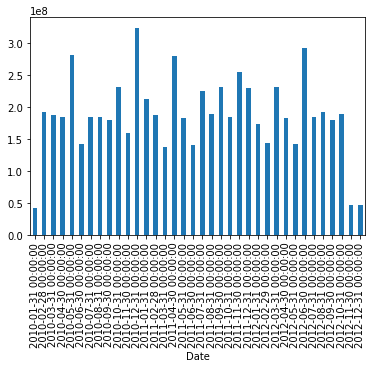

In [130]:
MonthlyGroups.plot.bar(x=None,y=None)
print(MonthlyGroups)

Date
2010-01-31    4.223988e+07
2010-07-31    1.168939e+09
2011-01-31    1.289673e+09
2011-07-31    1.150555e+09
2012-01-31    1.257900e+09
2012-07-31    1.175370e+09
2013-01-31    6.525423e+08
Freq: 6M, Name: Weekly_Sales, dtype: float64

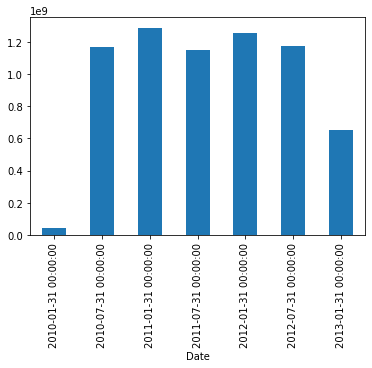

In [131]:
groupedbysem = total_sales_by_day.groupby(pd.Grouper(freq='6M'))
SemesterGroups = groupedbysem.sum()
SemesterGroups.plot.bar(x=None,y=None)
SemesterGroups

These two views illustrate that total sales follow a cyclical pattern that's volatile at the monthly level but smooths out at the semester level. The winter-to-spring semester on average has higher sales than the summer-to-winter semester. These higher sales largely come in December around "holiday season." This corroborates with the conclusions of Q4: winter-time holidays like Christmas and the Super Bowl have above average sales volume. Sales seem peak on a roughly quarterly basis consistently throughout the year across semesters. 

The tail ends of the data contain outliers. January 2010 and November/December of 2012 had below average total sales. This could be due to the status of the national economy during these periods. 

In [132]:
#Regression
#For Store 1 – Build  prediction models to forecast demand
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
#(starting from the earliest date in order). Hypothesize if CPI, unemployment, 
#and fuel price have any impact on sales.

In [133]:
# 1.) Get data for just store 1
S1Data = sales_data.loc[sales_data['Store'] == 1]
S1Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [134]:
#Order rows by date and create index variable
S1Data = S1Data.sort_values(by=['Date'])
S1Data = S1Data.reset_index(drop=True)
S1Data.index.name = 'level_0'

We now have a "level_0" column ordering Store 1's sales by date in ascending order. 

In [135]:
S1Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
level_0,,,,,,,,
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908
139,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573
140,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573


In [136]:
S1Data['Order_of_Days'] = S1Data.index
S1Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Order_of_Days
level_0,,,,,,,,,
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,0
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,1
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
...,...,...,...,...,...,...,...,...,...
138,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,138
139,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,139
140,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,140


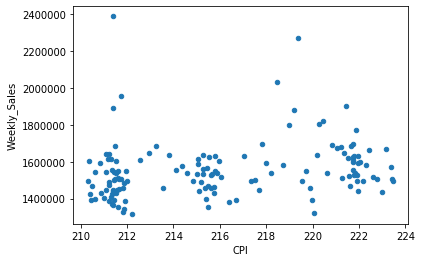

In [137]:
S1Data.plot(kind='scatter', x='CPI',y='Weekly_Sales')
plt.show()

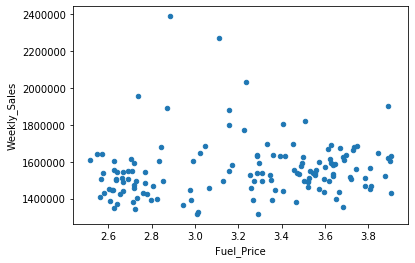

In [138]:
S1Data.plot(kind='scatter', x='Fuel_Price',y='Weekly_Sales')
plt.show()

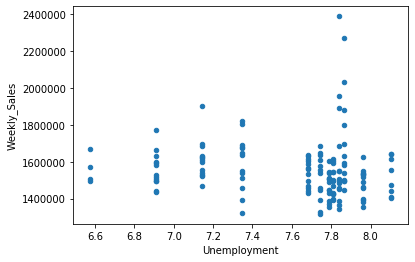

In [139]:
S1Data.plot(kind='scatter', x='Unemployment',y='Weekly_Sales')
plt.show()

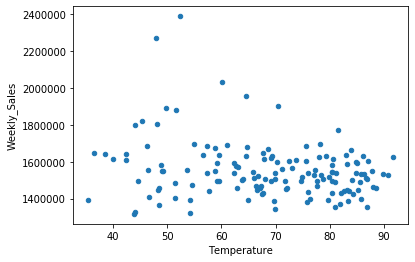

In [140]:
S1Data.plot(kind='scatter', x='Temperature',y='Weekly_Sales')
plt.show()

Based on these scatterplots, I hypothesize that weekly sales will decrease as temperatures rise and increase as unemployment rises. Fuel price and CPI don't seem to have a strong relationship with sales figures. 

In [141]:
#Test train split
X = S1Data[['Order_of_Days','Temperature','Fuel_Price','Unemployment']]
y = S1Data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [142]:
#Define the model
LR = LinearRegression()
LR.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
prediction = LR.predict(X_test.values)
prediction

array([1586252.29636021, 1620120.8046501 , 1478037.33210323,
       1539266.25719456, 1526807.35256936, 1477759.71842041,
       1537202.15618697, 1535529.17409266, 1571525.30092805,
       1459610.01870724, 1557790.5118898 , 1491656.5458801 ,
       1568177.96490285, 1519224.90821647, 1595658.11592461,
       1478142.55253797, 1591344.43234224, 1466262.35342893,
       1468645.33712815, 1467048.01081352, 1592301.99667588,
       1534572.38596508, 1591270.8335824 , 1497649.34346201,
       1548467.46787088, 1545463.13316064, 1577957.64410918,
       1504590.25931082, 1577200.54200049, 1558750.9374941 ,
       1465173.61657084, 1468024.36334048, 1523342.18989042,
       1539478.56598502, 1510622.16306683, 1565646.7746349 ])

In [144]:
# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficients: 
 [  463.30877401 -1837.48778684 46560.67509664  5670.54508751]
Mean squared error: 44745779379.26
Coefficient of determination: 0.08


R^2 measures the strength of the relationship between this regression model and Store 1's sales. A 0.38 value is relatively weak. Paired with a large mean squared error, these metrics reveal this model has little predictive ability. However, the hypothesis that sales are positively correlated with unemployment and negatively correlated with temperature is consistent with the two coefficients assigned to these variables. 

In [145]:
#Test train split
X2 = S1Data[['Holiday_Flag','Temperature','Fuel_Price','Unemployment']]
y2 = S1Data['Weekly_Sales']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
#Define the model
LR2 = LinearRegression()
LR2.fit(X2_train.values, y2_train.values)
prediction2 = LR2.predict(X2_test.values)
prediction2

array([1787196.9251777 , 1585302.35587285, 1561469.41416979,
       1763688.5836978 , 1545577.2493737 , 1455421.64462723,
       1515997.10781146, 1584706.07271221, 1551220.29786214,
       1518869.25442642, 1500438.44006251, 1501277.22729515,
       1560550.83687716, 1560543.91940019, 1625535.30447228,
       1664975.58286751, 1573520.96219372, 1565901.24041746,
       1517936.36791749, 1549003.45827651, 1498175.91858847,
       1522901.75617321, 1509201.33150306, 1525876.87274798,
       1447139.61649385, 1494266.08981118, 1582763.67185855,
       1781824.97750413, 1458569.62485917, 1805266.67562091,
       1575325.07897251, 1813478.31010418, 1552413.77582801,
       1448772.46157243, 1733564.19634969, 1536889.33558811])

In [146]:
# The coefficients
print('Coefficients: \n', LR2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, prediction2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, prediction2))

Coefficients: 
 [199356.94084097  -3092.39018692  61983.84197138  -3063.22911176]
Mean squared error: 24844456871.75
Coefficient of determination: -0.20


This model replaces the order of the dates with the holiday flag. R^2 increases, but MSE more than triples, making this an inferior model to the first. Now we turn to weekday. 

In [147]:
#creating a day of the week column
S1Data['Day_of_Week'] = S1Data['Date'].dt.day_name()
S1Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Order_of_Days,Day_of_Week
level_0,,,,,,,,,,
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,0,Sunday
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,1,Thursday
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2,Sunday
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3,Friday
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,Friday
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,138,Monday
139,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,139,Friday
140,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,140,Friday


In [148]:
def NumberedDay (row):
    if row['Day_of_Week'] == 'Sunday':
        return 0
    elif row['Day_of_Week'] == 'Monday':
        return 1
    elif row['Day_of_Week'] == 'Tuesday':
        return 2
    elif row['Day_of_Week'] == 'Wednesday':
        return 3
    elif row['Day_of_Week'] == 'Thursday':
        return 4
    elif row['Day_of_Week'] == 'Friday':
        return 5
    elif row['Day_of_Week'] == 'Saturday':
        return 6
S1Data.apply (lambda row: NumberedDay(row), axis=1)

level_0
0      0
1      4
2      0
3      5
4      5
      ..
138    1
139    5
140    5
141    1
142    1
Length: 143, dtype: int64

In [149]:
S1Data['NumberedDay'] = S1Data.apply (lambda row: NumberedDay(row), axis=1)
S1Data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Order_of_Days,Day_of_Week,NumberedDay
level_0,,,,,,,,,,,
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,0,Sunday,0
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,1,Thursday,4
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2,Sunday,0
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3,Friday,5
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,138,Monday,1
139,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,139,Friday,5
140,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,140,Friday,5


Now we're ready to develop a new regression model. 

In [150]:
#Test train split
X = S1Data[['NumberedDay','Holiday_Flag','Temperature','Fuel_Price','Unemployment']]
y = S1Data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Define the model
LR = LinearRegression()
LR.fit(X_train.values, y_train.values)
prediction = LR.predict(X_test.values)
prediction

array([1447526.79049349, 1597178.90652982, 1578274.85779391,
       1488839.21592475, 1567109.11800187, 1554800.96590844,
       1524707.09279135, 1514992.91831937, 1515852.38101937,
       1550885.94666457, 1580360.95333127, 1529082.35720832,
       1497746.22500545, 1444825.79010472, 1592572.65052213,
       1578042.26763698, 1445023.93902141, 1579622.73312744,
       1560057.84527592, 1505136.15920467, 1619786.66069167,
       1690856.95861182, 1503332.93172457, 1586792.42262022,
       1527723.70313126, 1520518.92368128, 1511867.10063225,
       1561058.57164746, 1580037.39406392, 1605070.21933363,
       1572609.99849965, 1575116.83441783, 1538098.88225101,
       1587587.83986631, 1548430.25256917, 1578504.76465587])

In [151]:
# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction))

Coefficients: 
 [-21330.15532082  54370.01681857  -3206.40029536  58476.31153893
 -21024.97460838]
Mean squared error: 15620006551.44
Coefficient of determination: 0.12


This model has the largest MSE and lowest R^2 value. Based on these results, the best linear regression model using the ordered list of dates, temperature, fuel price, and unemployment had the best results. Temperature and unemployment consistently were the variables with the most predictive power.  